In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from pyod.models.lof import LOF
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# Loading the dataset
data = pd.read_csv("crop_recommendation.csv") 

In [2]:
#displaying the data
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
# Separating  features and labels
X = data.iloc[:, :-1].values  # Features: N, P, K, temperature, humidity, ph, rainfall
y = data.iloc[:, -1].values    # Labels

In [4]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [5]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X_train.shape

(1760, 7)

In [8]:
X_test.shape

(440, 7)

In [9]:
y_train.shape

(1760,)

In [10]:
y_test.shape

(440,)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [13]:
X_test_scaled

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

In [14]:
# Train LOF model
lof = LOF(contamination=0.1)  
lof.fit(X_train_scaled)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [15]:
#################################################################
# Predictions on train and test data
train_outlier_scores = lof.decision_function(X_train_scaled)
test_outlier_scores = lof.decision_function(X_test_scaled)
train_outlier_scores

array([1.07109314, 0.98042539, 1.00152026, ..., 1.00290941, 0.98656512,
       1.01539136])

In [16]:
test_outlier_scores

array([0.95576267, 0.98834425, 1.0451848 , 1.01514467, 0.98698879,
       1.03810964, 1.05523707, 1.05875563, 1.02729456, 1.06258999,
       0.99840311, 1.05101079, 0.99328536, 1.00343318, 1.01116039,
       1.04227601, 1.01504008, 1.02042012, 1.20561252, 0.96547037,
       0.99011143, 1.09286009, 1.24254227, 1.15543032, 0.97986812,
       0.97740869, 1.03103821, 1.03693163, 1.12011843, 1.01129802,
       1.00685301, 1.01306521, 0.99795183, 1.07728162, 0.9968305 ,
       0.96313223, 0.97633844, 1.05632605, 1.05035927, 1.05720034,
       1.26312179, 0.9819389 , 1.03015022, 0.99568635, 1.11324907,
       0.99843318, 1.26272387, 1.00300644, 1.0539781 , 1.02232781,
       1.12262551, 1.0323564 , 1.13218496, 1.00413478, 1.0269478 ,
       0.9969048 , 1.02952051, 0.96135678, 0.98526973, 1.01525849,
       0.99750411, 1.00677421, 1.03914217, 1.10396883, 1.30212023,
       1.12053091, 1.25502259, 1.07087159, 1.00454432, 1.48738499,
       1.03940475, 1.01658402, 0.98916244, 0.99081472, 0.99921

In [17]:
# Output outlier scores for test data
print("Outlier scores for test data:", test_outlier_scores)

Outlier scores for test data: [0.95576267 0.98834425 1.0451848  1.01514467 0.98698879 1.03810964
 1.05523707 1.05875563 1.02729456 1.06258999 0.99840311 1.05101079
 0.99328536 1.00343318 1.01116039 1.04227601 1.01504008 1.02042012
 1.20561252 0.96547037 0.99011143 1.09286009 1.24254227 1.15543032
 0.97986812 0.97740869 1.03103821 1.03693163 1.12011843 1.01129802
 1.00685301 1.01306521 0.99795183 1.07728162 0.9968305  0.96313223
 0.97633844 1.05632605 1.05035927 1.05720034 1.26312179 0.9819389
 1.03015022 0.99568635 1.11324907 0.99843318 1.26272387 1.00300644
 1.0539781  1.02232781 1.12262551 1.0323564  1.13218496 1.00413478
 1.0269478  0.9969048  1.02952051 0.96135678 0.98526973 1.01525849
 0.99750411 1.00677421 1.03914217 1.10396883 1.30212023 1.12053091
 1.25502259 1.07087159 1.00454432 1.48738499 1.03940475 1.01658402
 0.98916244 0.99081472 0.99921147 1.02115275 0.97029968 1.00290385
 1.06698549 1.03190385 1.0337752  1.02626099 1.07756697 0.99525044
 1.06249449 0.99542534 0.99778862

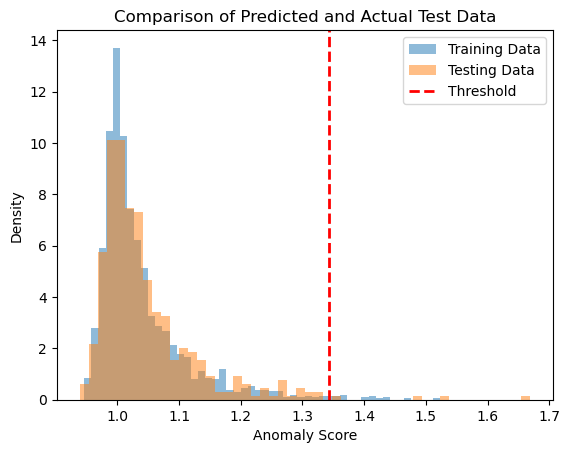

In [18]:
# Plot the histograms of the anomaly scores with threshold
plt.hist(train_outlier_scores, bins=50, density=True, alpha=0.5, label='Training Data')
plt.hist(test_outlier_scores, bins=50, density=True, alpha=0.5, label='Testing Data')
plt.axvline(np.percentile(train_outlier_scores, 99), color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Comparison of Predicted and Actual Test Data')
plt.legend()
plt.show()

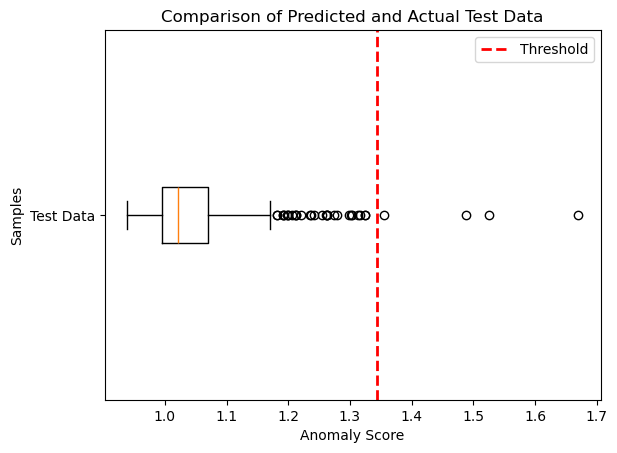

In [19]:
# Create a box plot for the test data
plt.boxplot(test_outlier_scores, vert=False, labels=['Test Data'])
plt.axvline(np.percentile(train_outlier_scores, 99), color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Samples')
plt.title('Comparison of Predicted and Actual Test Data')
plt.legend()
plt.show()

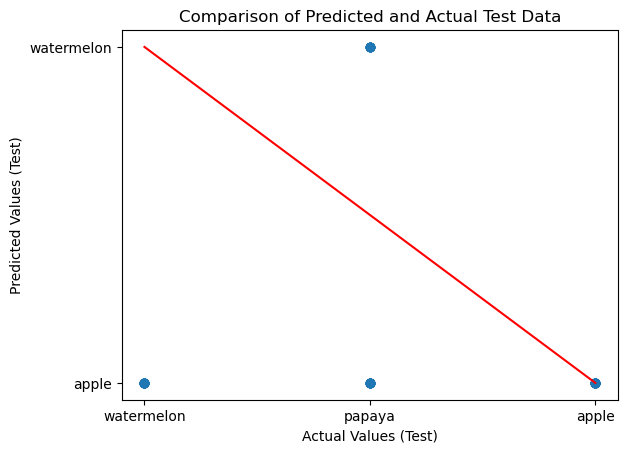

In [20]:
y_pred_test_lof = lof.predict(X_test_scaled)
plt.scatter(y_test, y_pred_test_lof)
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Comparison of Predicted and Actual Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

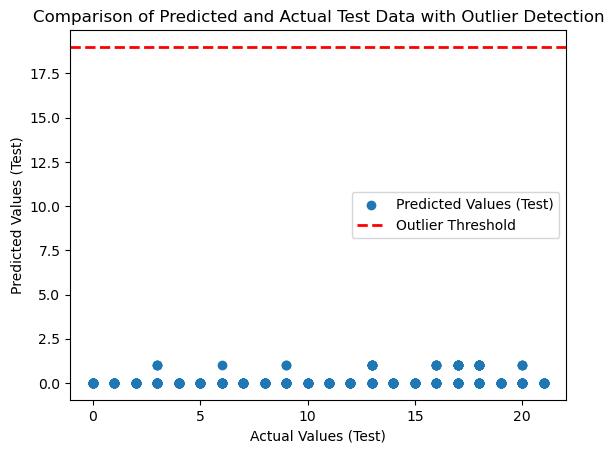

In [21]:

# Convert the string labels to numerical values
le = LabelEncoder()
y_test_num = le.fit_transform(y_test)

# Plot the comparison between the actual and predicted values for the test data
plt.scatter(y_test_num, y_pred_test_lof, label='Predicted Values (Test)')
plt.axhline(y=np.percentile(y_test_num, 90), color='r', linestyle='dashed', linewidth=2, label='Outlier Threshold')
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Comparison of Predicted and Actual Test Data with Outlier Detection')
plt.legend()
plt.show()

In [22]:
# Identify the outliers
    train_outliers = lof.predict(X_train_scaled)
    test_outliers = lof.predict(X_test_scaled)

    # Visualize the feature values of the outliers using a pairplot
    train_outliers_df = pd.DataFrame(X_train_scaled[train_outliers == -1], columns=data.columns[:-1])
    test_outliers_df = pd.DataFrame(X_test_scaled[test_outliers == -1], columns=data.columns[:-1])

    plt.figure(figsize=(10, 6))
    sns.pairplot(train_outliers_df, diag_kind='kde')
    plt.suptitle('Pairplot of Train Outliers')
    #st.pyplot()

    plt.figure(figsize=(10, 6))
    sns.pairplot(test_outliers_df, diag_kind='kde')
    plt.suptitle('Pairplot of Test Outliers')
    #st.pyplot()

IndentationError: unexpected indent (553046038.py, line 2)